In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")

In [2]:
x = np.random.randn(32)

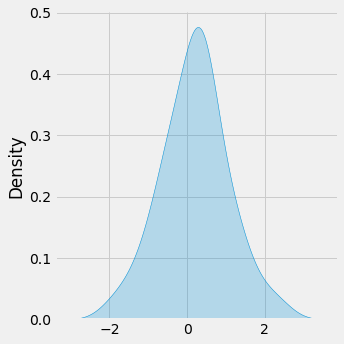

In [3]:
sns.displot(x, kind="kde", fill=True)

In [4]:
x.mean(), x.std()

(0.1947493639578542, 0.8344559681267802)

In [5]:
x_shift = 5*x + 3

In [7]:
x_shift.mean(), x_shift.std()

(3.9737468197892705, 4.172279840633901)

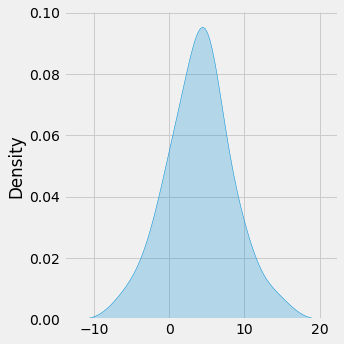

In [8]:
sns.displot(x_shift, kind="kde", fill=True)


In [9]:
x_original = (1/5)*x_shift - 3/5

x_unscaled =  x_shift + 10

In [10]:
x_original.mean()

0.19474936395785422

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

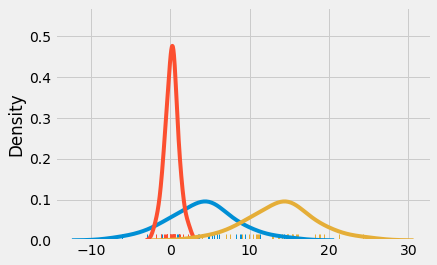

In [11]:
sns.distplot(x_shift, hist=False, rug=True)
sns.distplot(x_original,  hist=False, rug=True)
sns.distplot(x_unscaled,  hist=False, rug=True)

plt.show()

# Bernouli Random Variable

In [12]:
import tensorflow as tf
import tensorflow_probability as tfp

In [13]:
prob = 0.3

r = tfp.distributions.Bernoulli(probs=prob, dtype=tf.float32).sample(sample_shape=(10,1))
r

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [14]:
y_prev = tf.random.normal((10,1))
y_prev

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 0.88500625],
       [ 0.15764977],
       [-0.26236185],
       [ 0.02855736],
       [-0.9382997 ],
       [-1.4260503 ],
       [-0.66322035],
       [-0.83455044],
       [ 0.6917024 ],
       [ 0.78469485]], dtype=float32)>

In [15]:
tf.math.multiply(y_prev, r)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 0.88500625],
       [ 0.15764977],
       [-0.        ],
       [ 0.        ],
       [-0.9382997 ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [ 0.6917024 ],
       [ 0.        ]], dtype=float32)>

# Dropout layer

In [16]:
from tensorflow import keras

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# n_epochs = 2
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid))

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dropout (Dropout)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1

In [20]:
layer = tf.keras.layers.Dropout(.3, input_shape=(1,))
layer

In [21]:
data=tf.random.normal((10,1))
data

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-0.46051294],
       [-0.7648982 ],
       [ 0.68822986],
       [ 1.3569262 ],
       [ 0.25754902],
       [ 0.38952762],
       [-0.4365533 ],
       [ 2.462784  ],
       [ 0.39579082],
       [ 1.1869262 ]], dtype=float32)>

In [22]:
layer(data, training=True)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[-0.        ],
       [-1.0927117 ],
       [ 0.        ],
       [ 1.9384661 ],
       [ 0.36792716],
       [ 0.55646807],
       [-0.6236476 ],
       [ 3.518263  ],
       [ 0.        ],
       [ 1.695609  ]], dtype=float32)>

In [23]:
l = tf.keras.layers.Dropout(.1, input_shape=(1,))

In [24]:
d = tf.ones((10,1))*5
d

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.],
       [5.]], dtype=float32)>

In [25]:
l(d, training=True)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[5.555556],
       [5.555556],
       [5.555556],
       [0.      ],
       [5.555556],
       [5.555556],
       [5.555556],
       [5.555556],
       [5.555556],
       [5.555556]], dtype=float32)>

In [26]:
5*(1/(1-0.1))

5.555555555555555